In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Centróides iniciais: [15. 25. 40.]

Iteração 1
Atribuição de clusters: [0 0 0 0 1 1 2 2 2 2]
Novos centróides: [14.75 23.5  38.25]

Iteração 2
Atribuição de clusters: [0 0 0 0 1 1 2 2 2 2]
Novos centróides: [14.75 23.5  38.25]

? Convergência atingida!

Cluster 1: [12 14 15 18] (centróide = 14.75)

Cluster 2: [22 25] (centróide = 23.50)

Cluster 3: [33 35 40 45] (centróide = 38.25)


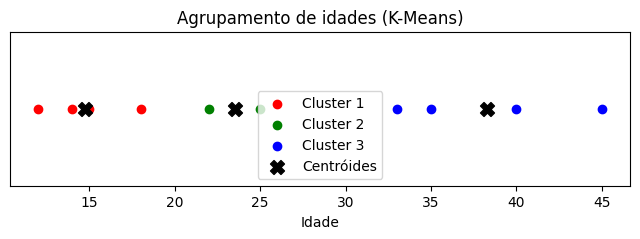

In [ ]:
# 1. Dados iniciais (idades)
idades = np.array([12, 14, 15, 18, 22, 25, 33, 35, 40, 45])

# Número de clusters
k = 3


# 2. Centróides iniciais (escolha aleatória ou fixa)
# Vamos fixar manualmente para seguir o exemplo didático

centroides = np.array([15, 25, 40], dtype=float)
print("Centróides iniciais:", centroides)

# 3. Função para calcular distâncias e reatribuir clusters
def atribuir_clusters(dados, centroides):
    clusters = []
    for idade in dados:

        # calcula distância de cada idade para cada centróide
        distancias = np.abs(idade - centroides)

        # escolhe o índice do centróide mais próximo
        cluster = np.argmin(distancias)
        clusters.append(cluster)

    return np.array(clusters)


# 4. Iterações do K-Means (manual)

max_iter = 10

for i in range(max_iter):
    clusters = atribuir_clusters(idades, centroides)
    novos_centroides = np.array([idades[clusters == j].mean() for j in range(k)])
    
    print(f"\nIteração {i+1}")
    print("Atribuição de clusters:", clusters)
    print("Novos centróides:", novos_centroides)

    # condição de parada (quando centróides não mudam mais)
    if np.allclose(centroides, novos_centroides):
        print("\n Convergência atingida!")
        break

    centroides = novos_centroides

# 5. Resultado final

for j in range(k):
    grupo = idades[clusters == j]
    print(f"\nCluster {j+1}: {grupo} (centróide = {centroides[j]:.2f})")



# 6. Visualização gráfica (1D)
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8,2))
for j in range(k):
    plt.scatter(idades[clusters == j], [0]*len(idades[clusters == j]),
                color=colors[j], label=f'Cluster {j+1}')

plt.scatter(centroides, [0]*len(centroides), color='black', marker='X', s=100, label='Centróides')
plt.yticks([])
plt.xlabel('Idade')
plt.title('Agrupamento de idades (K-Means)')
plt.legend()
plt.show()



# 7. Comparação com KMeans do scikit-learn


#modelo = KMeans(n_clusters=k, random_state=0, n_init='auto')

#modelo.fit(idades.reshape(-1,1))



#print("\n=== Comparação com scikit-learn ===")

#print("Centróides encontrados:", modelo.cluster_centers_.flatten())

#print("Labels atribuídos:", modelo.labels_)